# Geopandas
<!-- 12-2 -->

Data download: 국가표준노드링크 https://its.go.kr/nodelink/nodelinkRef

행정구역 http://www.gisdeveloper.co.kr/?p=2332

국가표준노드링크 부르기 # link crs: to epsg = 5186

파일 확인

대부분의 지리 데이터 처리는 WGS84 좌표계를 기준으로 합니다.

한국 지도는 보통 TM좌표계를 사용하는데 이를 WGS84 좌표계로 변환하는 실습입니다.



In [1]:
import geopandas as gpd
import os

In [2]:
#web_path = "http://ranking.uos.ac.kr/class/VIS/ch12/data/nodelink/"
web_path= "C:/Users/jjjeo/OneDrive - UOS/class/2023 Data_Vis/Data/"
path_data = web_path+'MOCT_LINK.shp'
path_data


'C:/Users/jjjeo/OneDrive - UOS/class/2023 Data_Vis/Data/MOCT_LINK.shp'

In [3]:
k_link = gpd.read_file(path_data, encoding = 'cp949')

In [4]:
k_link.head()

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry
0,1860689001,1865963801,1865963701,2,107,000,-,국제과학로,0,0,000,30,0,0,0,414.856758,None,"LINESTRING (232063.149 427951.664, 231856.525 ..."
1,1860688901,1865963701,1865963801,2,107,000,-,국제과학로,0,0,000,30,0,0,0,414.211972,None,"LINESTRING (231788.078 427642.678, 231824.456 ..."
2,3280619601,3280218301,3280218501,2,107,003,-,-,0,0,000,30,0,0,0,102.163661,도로명없음,"LINESTRING (262099.848 260188.211, 262202.057 ..."
3,3280619701,3280218501,3280218301,2,107,003,-,-,0,0,000,30,0,0,0,102.036940,도로명없음,"LINESTRING (262201.405 260218.216, 262099.328 ..."
4,3280618801,3280218201,3280218101,2,107,000,-,-,0,0,000,30,0,0,0,347.266337,도로명없음,"LINESTRING (261766.168 260206.302, 261767.252 ..."


In [5]:
node_data = web_path + "MOCT_NODE.shp"
k_node = gpd.read_file(node_data, encoding = 'cp949')
k_node.head()

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,geometry
0,3680002100,101,수성2교차로,0,None,POINT (306862.529 364128.758)
1,1865949201,101,둔곡국가산업단지,0,None,POINT (232175.564 428286.284)
2,3280218301,101,-,0,교차로명없음,POINT (262099.284 260200.964)
3,3280218201,101,-,1,교차로명없음,POINT (261776.797 260206.481)
4,3280218101,101,여수성황고가교,1,None,POINT (261777.643 259856.559)


In [6]:
for i in range(5):
    print("link data structure:",str(k_link['geometry'][i]))

link data structure: LINESTRING (232063.149422361 427951.6643572925, 231856.5253694015 427717.4942795344, 231838.1236964817 427697.0152383912, 231832.2729439153 427691.8577327733, 231823.8039285892 427685.1860171618, 231808.8602091903 427673.103455518, 231779.5934807176 427649.8169223525)
link data structure: LINESTRING (231788.0777558524 427642.6782842039, 231824.4561066233 427669.1280115336, 231850.9743371339 427691.9000851774, 231863.8391896943 427705.7772148797, 231873.7861101949 427716.8334482851, 232013.8950023078 427876.1270675666, 232072.0739812801 427942.8318627411)
link data structure: LINESTRING (262099.8480852154 260188.2110035898, 262202.0568309196 260187.9557314837)
link data structure: LINESTRING (262201.4053703347 260218.2162991541, 262099.3279284727 260217.2216529207)
link data structure: LINESTRING (261766.1678993996 260206.3024042111, 261767.2521080472 259858.8835762343)


In [7]:
for i in range(5):
    print("node data structure:",str(k_node['geometry'][i]))

node data structure: POINT (306862.5290999946 364128.7581999949)
node data structure: POINT (232175.5636197628 428286.2841589035)
node data structure: POINT (262099.2841216855 260200.9640100425)
node data structure: POINT (261776.7968591276 260206.4805812582)
node data structure: POINT (261777.6434585629 259856.5594204891)


In [8]:
print("CRS of node", k_node.crs)
print("CRS of link", k_link.crs)

CRS of node PROJCS["ITRF2000_Central_Belt_60",GEOGCS["GCS_ITRF_2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4656"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
CRS of link PROJCS["ITRF2000_Central_Belt_60",GEOGCS["GCS_ITRF_2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4656"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["

In [9]:
crs_ = k_link.crs
type(crs_)
#%% 
# pyproj.crs.crs class 
# https://pyproj4.github.io/pyproj/dev/api/crs/crs.html
print(crs_.area_of_use)

None


In [10]:
crs_.coordinate_operation

<Coordinate Operation: Conversion>
Name: unnamed
Method: Transverse Mercator
Area of Use:
- undefined

In [11]:
crs_.coordinate_system

CS[Cartesian,2],
    AXIS["easting",east,
        ORDER[1],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]],
    AXIS["northing",north,
        ORDER[2],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]]

In [12]:
# epsg: 9001, Geodesy
# cs_to_cf() converts all coordinate systems (cs) 
# in the CRS to a list of Climate and Forecast (CF) Version 1.8 dicts.
crs_.cs_to_cf()

[{'axis': 'X',
  'long_name': 'Easting',
  'standard_name': 'projection_x_coordinate',
  'units': 'metre'},
 {'axis': 'Y',
  'long_name': 'Northing',
  'standard_name': 'projection_y_coordinate',
  'units': 'metre'}]

In [13]:
crs_.datum

DATUM["International_Terrestrial_Reference_Frame_2000",
    ELLIPSOID["GRS 1980",6378137,298.257222101,
        LENGTHUNIT["metre",1]],
    ID["EPSG",6656]]

In [14]:
crs_.ellipsoid

ELLIPSOID["GRS 1980",6378137,298.257222101,
    LENGTHUNIT["metre",1],
    ID["EPSG",7019]]

In [15]:
k_link_cv = k_link.to_crs(epsg=4326)
k_node_cv = k_node.to_crs(epsg=4326)

In [16]:
k_node_cv.head()

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,geometry
0,3680002100,101,수성2교차로,0,None,POINT (128.18322 35.86876)
1,1865949201,101,둔곡국가산업단지,0,None,POINT (127.35892 36.45224)
2,3280218301,101,-,0,교차로명없음,POINT (127.67972 34.93596)
3,3280218201,101,-,1,교차로명없음,POINT (127.67619 34.93603)
4,3280218101,101,여수성황고가교,1,None,POINT (127.67617 34.93287)


In [17]:
# crs: epsg=4326
sido_level_1_path = web_path+"ctp_rvn.shp"
sido_data = gpd.read_file(sido_level_1_path, encoding = 'cp949')
sido_data.head()


,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 966987.119 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1146778.390 1679623.999, 11469..."
2,27,Daegu,대구광역시,"POLYGON ((1087859.999 1760097.461, 1087859.951..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((897904.035 1961082.190, 897886..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 932781.680 1..."


In [18]:
sido_data['CTP_KOR_NM']

0       서울특별시
1       부산광역시
2       대구광역시
3       인천광역시
4       광주광역시
5       대전광역시
6       울산광역시
7     세종특별자치시
8         경기도
9         강원도
10       충청북도
11       충청남도
12       전라북도
13       전라남도
14       경상북도
15       경상남도
16    제주특별자치도
Name: CTP_KOR_NM, dtype: object

In [19]:
print("CRS: ",sido_data.crs)
sido_data.to_crs(epsg=4326, inplace=True)
sido_data.head()

CRS:  PROJCS["PCS_ITRF2000_TM",GEOGCS["GCS_ITRF_2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4656"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((127.12667 37.46863, 127.12667 37.468..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((129.11041 35.10108, 129.11196 ..."
2,27,Daegu,대구광역시,"POLYGON ((128.47278 35.83345, 128.47278 35.833..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((126.34274 37.64355, 126.34254 ..."
4,29,Gwangju,광주광역시,"POLYGON ((126.76029 35.25870, 126.76105 35.258..."


In [20]:
sido_name = '서울특별시'
#%%
sido_data['geometry'][0].contains(k_node_cv['geometry'][0])

False

In [21]:
f = lambda x: sido_data['geometry'][0].contains(x)
f(k_node_cv['geometry'][0])

False

In [22]:
result = k_node_cv['geometry'].apply(f)

In [23]:
k_node_cv.head()

,NODE_ID,NODE_TYPE,NODE_NAME,TURN_P,REMARK,geometry
0,3680002100,101,수성2교차로,0,None,POINT (128.18322 35.86876)
1,1865949201,101,둔곡국가산업단지,0,None,POINT (127.35892 36.45224)
2,3280218301,101,-,0,교차로명없음,POINT (127.67972 34.93596)
3,3280218201,101,-,1,교차로명없음,POINT (127.67619 34.93603)
4,3280218101,101,여수성황고가교,1,None,POINT (127.67617 34.93287)


In [24]:
result.sum()

8918

In [25]:
a = k_node_cv.loc[result,:]

<AxesSubplot:title={'center':'Seoul'}>

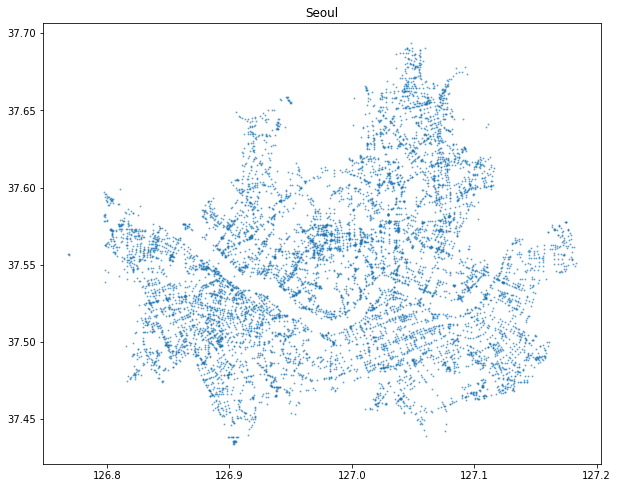

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Seoul")
a.plot(ax = ax, markersize = 1, alpha=0.5)

In [28]:
k_link_cv.head()

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,LENGTH,REMARK,geometry
0,1860689001,1865963801,1865963701,2,107,000,-,국제과학로,0,0,000,30,0,0,0,414.856758,None,"LINESTRING (127.35765 36.44923, 127.35533 36.4..."
1,1860688901,1865963701,1865963801,2,107,000,-,국제과학로,0,0,000,30,0,0,0,414.211972,None,"LINESTRING (127.35457 36.44645, 127.35498 36.4..."
2,3280619601,3280218301,3280218501,2,107,003,-,-,0,0,000,30,0,0,0,102.163661,도로명없음,"LINESTRING (127.67973 34.93584, 127.68084 34.9..."
3,3280619701,3280218501,3280218301,2,107,003,-,-,0,0,000,30,0,0,0,102.036940,도로명없음,"LINESTRING (127.68084 34.93611, 127.67972 34.9..."
4,3280618801,3280218201,3280218101,2,107,000,-,-,0,0,000,30,0,0,0,347.266337,도로명없음,"LINESTRING (127.67608 34.93603, 127.67606 34.9..."


In [57]:
v1 = k_link_cv["F_NODE"].isin(a["NODE_ID"])
v2 = k_link_cv["T_NODE"].isin(a["NODE_ID"])
v = v1 | v2
print("# of total links: ", len(v))
print("# of the links in Seoul: ", sum(v))

# of total links:  540325
# of the links in Seoul:  23995


In [58]:
b = k_link_cv.loc[v,:]

<AxesSubplot:title={'center':'Seoul'}>

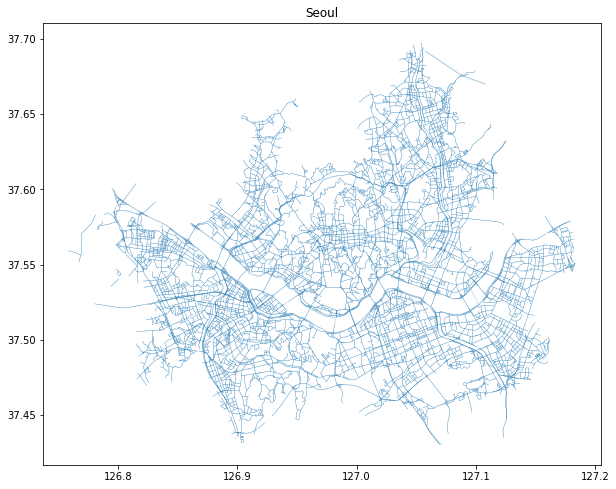

In [67]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Seoul")
b.plot(ax=ax, linewidth=0.2)